In [1]:
import numpy as np
import pandas as pd
from scipy.signal import resample
from scipy.spatial import procrustes as proc
import matplotlib.pyplot as plt


%matplotlib inline

In [15]:
normal_df = pd.read_excel('sheetdata/United data.xlsx', sheet_name='normal', header=[0, 1])
normal_df.head()

hip_1                hip_2                hip_3               knee_1  \
          x          y         x          y         x          y         x   
0  0.004444  19.622642  0.004444  17.735849  0.002963  15.597484  0.002972   
1  0.017778  19.245283  0.010370  17.358491  0.008889  14.842767  0.010401   
2  0.031111  18.742138  0.017778  17.106918  0.017778  14.088050  0.022288   
3  0.044444  18.238994  0.026667  16.855346  0.031111  13.333333  0.032689   
4  0.059259  17.610063  0.035556  16.477987  0.040000  12.830189  0.043091   

             knee_2           knee_3          
        y         x      y         x       y  
0   4.750  0.001486  4.250  0.001486   4.500  
1   5.375  0.008915  4.875  0.007429   5.750  
2   7.000  0.019316  5.875  0.013373   7.250  
3   8.750  0.028232  6.750  0.020802   8.875  
4  10.500  0.035661  7.625  0.031204  10.750

In [16]:
pat_df = pd.read_excel('sheetdata/United data.xlsx', sheet_name='baskakova', header=[0, 1, 2])
pat_df.head()

right                                                            \
        hip                knee                   ankle                 
          x     y app         x         y app         x         y app   
0  0.004684  1.50 NaN  0.017456  1.001898 NaN  0.009828 -0.771657 NaN   
1  0.014396  2.25 NaN  0.024938  2.509450 NaN  0.024570 -0.767853 NaN   
2  0.026720  2.00 NaN  0.032419  4.268574 NaN  0.044226 -0.504716 NaN   
3  0.039158  1.00 NaN  0.047382  5.271099 NaN  0.063882  0.274550 NaN   
4  0.051635 -0.25 NaN  0.059850  6.274251 NaN  0.081081  0.537053 NaN   

       left                                                                
        hip                    knee                   ankle                
          x         y app         x         y app         x         y app  
0  0.009524  0.470588 NaN  0.007211  0.248197 NaN  0.004717 -0.751179 NaN  
1  0.030952 -0.235294 NaN  0.014521  1.996370 NaN  0.018868 -0.504717 NaN  
2  0.050000 -1.176471 NaN  0.021816  3.494546 NaN  0.025943 -0.006486 NaN  
3  0.066667 -1.647059 NaN  0.026712  4.993322 NaN  0.037736  0.990566 NaN  
4  0.085714 -2.352941 NaN  0.031608  6.492098 NaN  0.051887  1.487028 NaN

In [24]:
from scipy.interpolate import CubicSpline as cubic
from scipy.interpolate import interp1d as inter

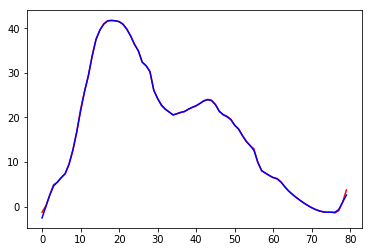

In [31]:
rkx = pat_df['right']['knee']['x'].dropna().values
rky = pat_df['right']['knee']['y'].dropna().values
rky[-1] = rky[0]
rhx = pat_df['right']['hip']['x'].dropna().values
rhy = pat_df['right']['hip']['y'].dropna().values

t = np.linspace(0, 1, num=80)
r_knee_cs = cubic(rkx, rky, bc_type='periodic')
r_knee_y = r_knee_cs(t)

r_knee_inter = inter(rkx, rky, fill_value='extrapolate')
r_knee_y_inter = r_knee_inter(t)


plt.plot(r_knee_y, 'r', r_knee_y_inter, 'b')

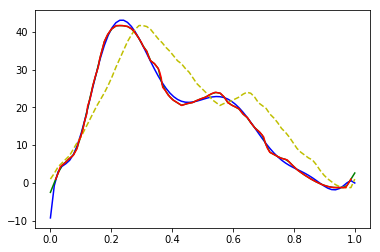

In [39]:
r_knee_poly = np.poly1d(np.polyfit(rkx, rky, deg=12))(t)
r_hip_poly = np.poly1d(np.polyfit(rhx, rhy, deg=12))(t)


plt.plot(t, r_knee_poly, 'b', t, r_knee_y_inter, 'g', t, resample(rky, num=80), '--y')
plt.plot(rkx, rky, 'r')